In [1]:
%matplotlib inline

In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/klyuchnikov/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cutoff = 7.5

pwd = ''
u=mda.Universe(pwd+'0.pdb', pwd+'nucleic.dcd')

PMO = u.select_atoms('name C5 and resid 2-26')
PEP = u.select_atoms('name C5 and resid 2-26')

PMOlist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
PEPlist = [1, 2, 3, 4, 5, 6]

PMO_com = PMO.center_of_mass(compound='residues')
PEP_com = PEP.center_of_mass(compound='residues')

n_PMO = len(PMO_com)
n_PEP = len(PEP_com)


#print('PMO has {} residues and PEP has {} residues'.format(n_PMO, n_PEP))

time_frac = np.zeros([n_PEP, n_PMO])

print(time_frac)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/klyuchnikov/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


In [4]:
frames = 0
with open("distance.dat", "w") as h:
    for ts in u.trajectory:
        frames = frames + 1
        PMO = u.select_atoms('name C5 and resid 2-26')
        PEP = u.select_atoms('name C5 and resid 2-26')

        PMO_com = PMO.center_of_mass(compound='residues')
        PEP_com = PEP.center_of_mass(compound='residues')

        n_PMO = len(PMO_com)
        n_PEP = len(PEP_com)

        res_dist = distances.distance_array(PMO.positions, PEP.positions, box=u.dimensions)
        yID = 0
        for row in res_dist:
            xID = 0
            for col in row:
                if (float(col) < cutoff):
                    time_frac[xID][yID] += 1
                xID = xID + 1
            yID = yID + 1
        #print(res_dist)
        #for row in res_dist:
        #    h.write(str(row.min()) + "\t")
        #h.write("\n") 
yID = 0
for row in res_dist:
    xID = 0
    for col in row:
        time_frac[xID][yID] /= frames
        time_frac[xID][yID] *= 100
        xID = xID + 1
    yID = yID + 1  
    
#print(time_frac)


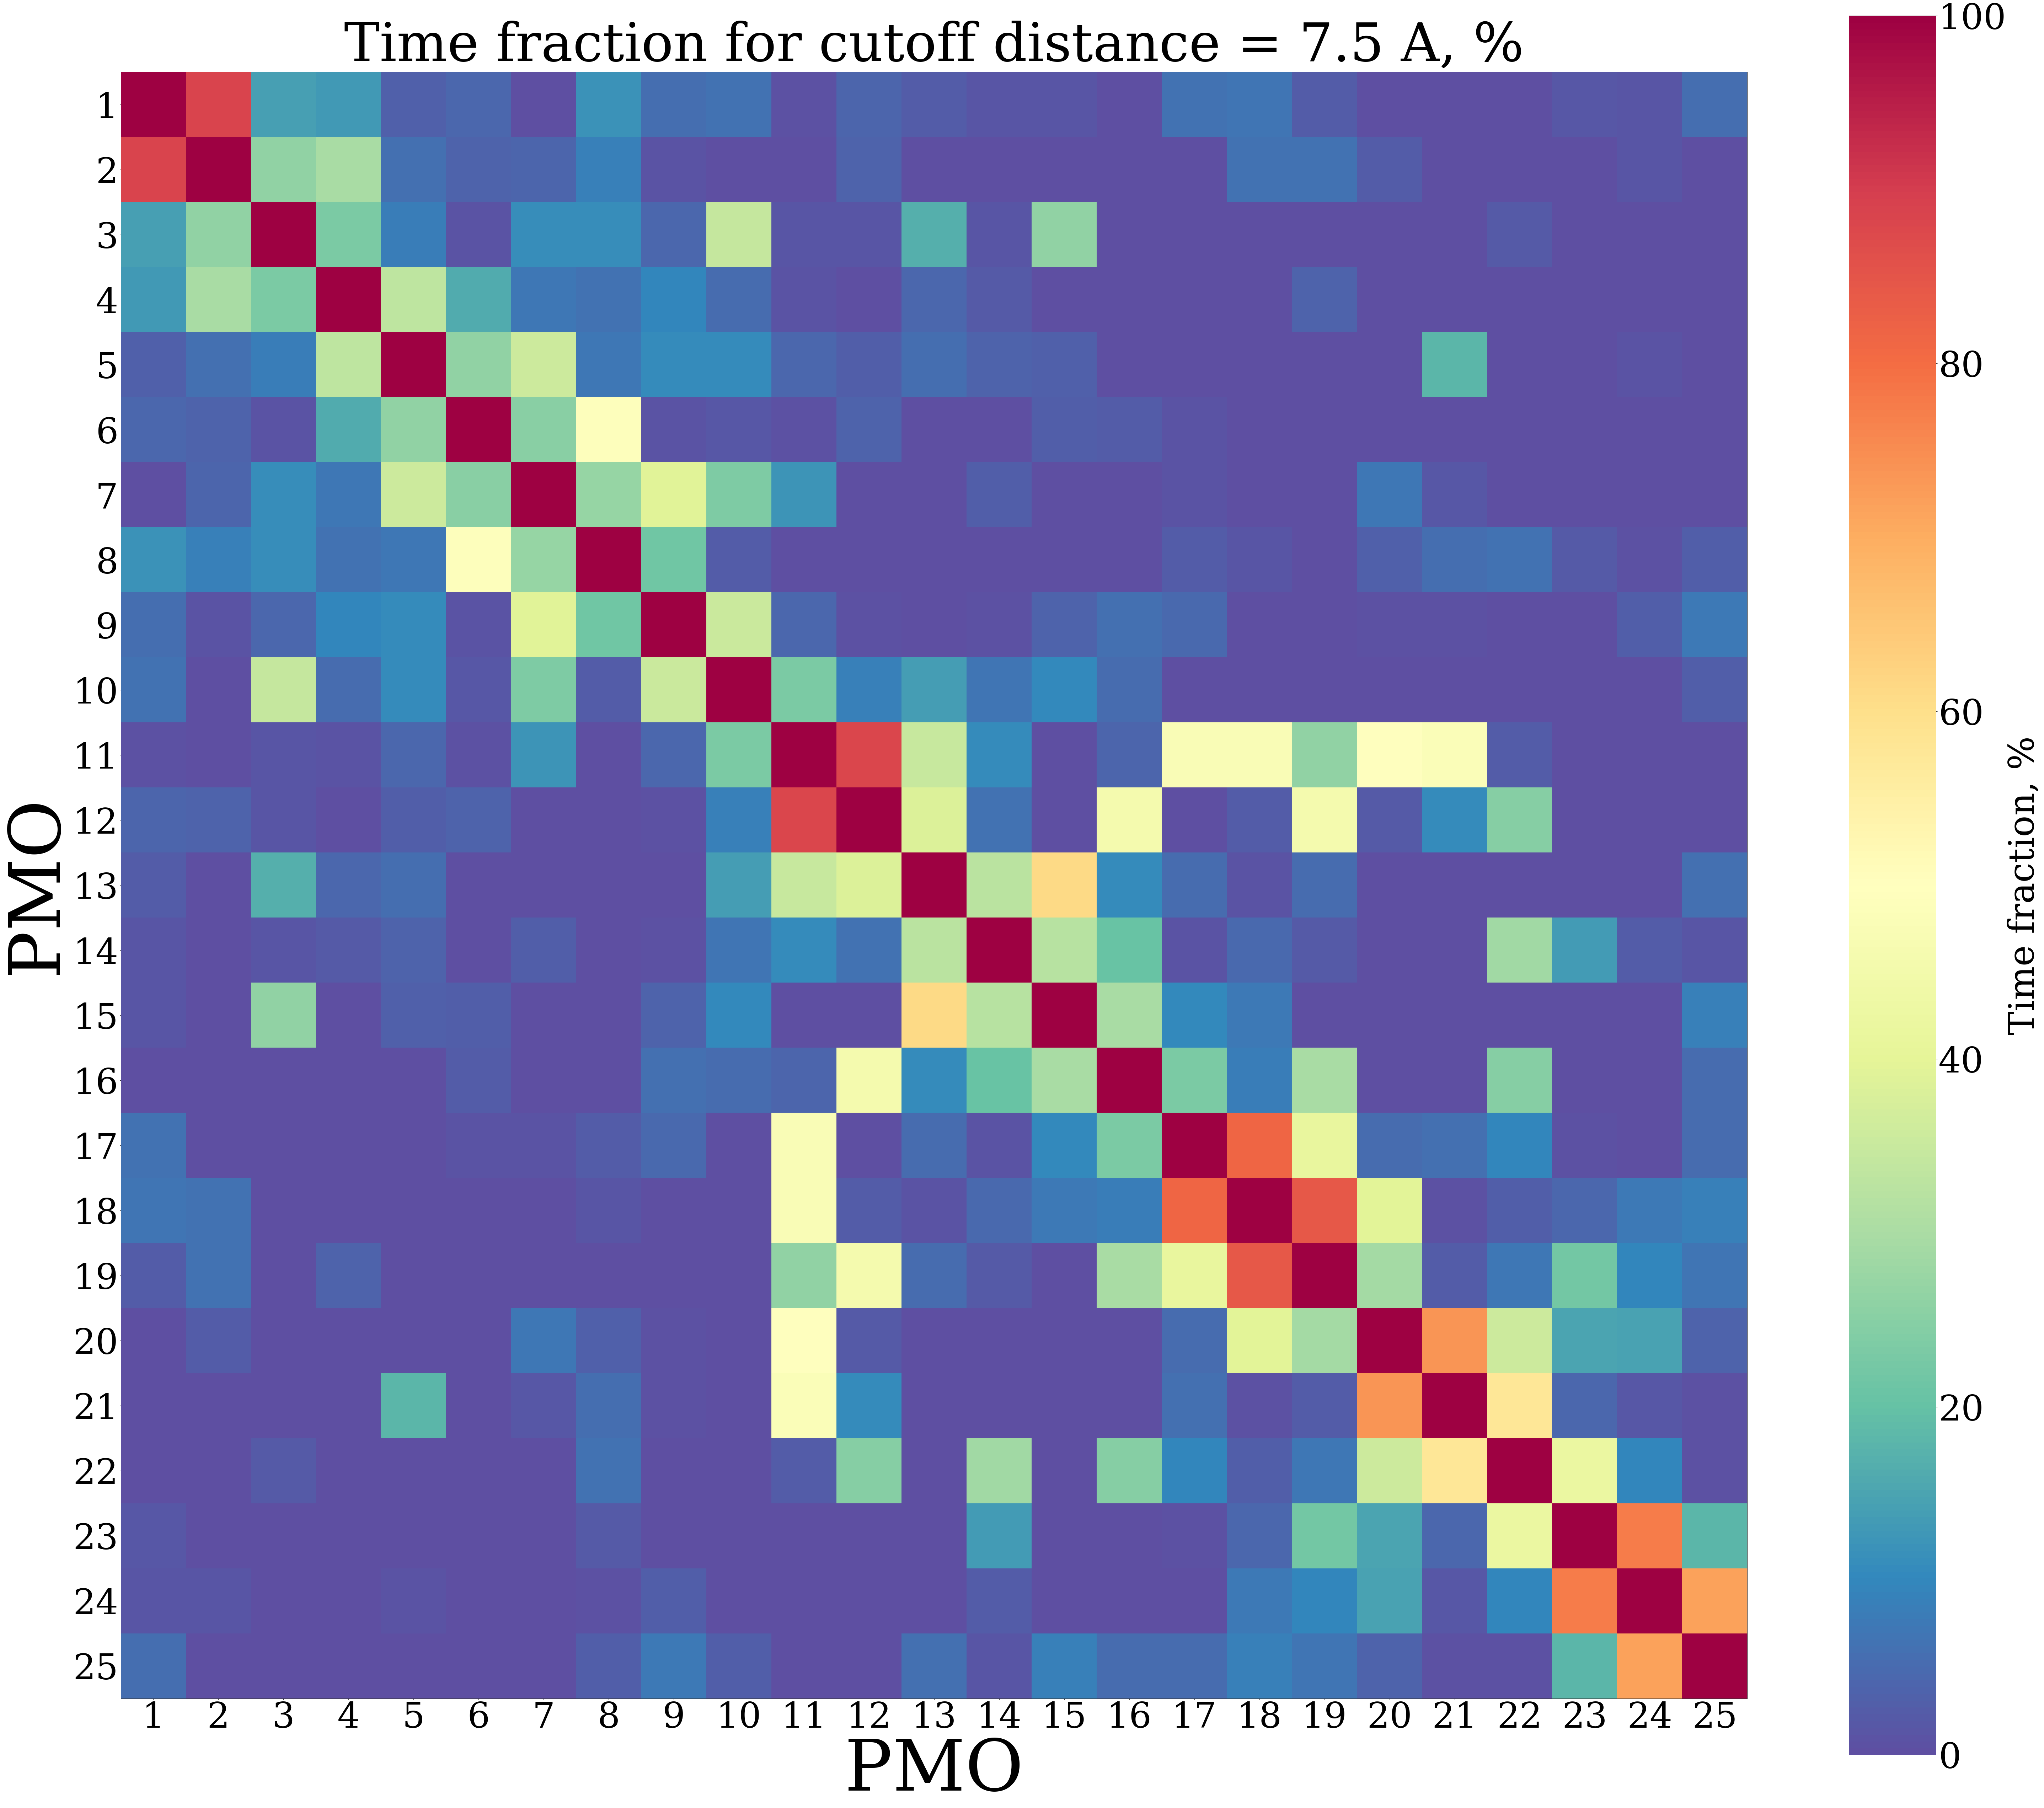

In [14]:
plt.rcParams["font.family"] = "Serif"


fig2, ax2 = plt.subplots(figsize=(102.5, 90))
im2 = ax2.imshow(time_frac, origin='upper', cmap='Spectral_r')

# add residue ID labels to axes
tick_interval = 1
ax2.set_yticks(np.arange(n_PEP)[::tick_interval])
ax2.set_xticks(np.arange(n_PMO)[::tick_interval])
ax2.set_yticklabels(PMOlist, fontsize = 100.0)
ax2.set_xticklabels(PMOlist, fontsize = 100.0)

# add figure labels and titles
plt.ylabel('PMO', fontsize = 200.0)
plt.xlabel('PMO', fontsize = 200.0)
plt.title('Time fraction for cutoff distance = 7.5 A, %', size = 150)

# colorbar
cbar2 = fig2.colorbar(im2)
cbar2.ax.set_ylabel('Time fraction, %', fontsize = 100)
cbar2.ax.tick_params(labelsize=100)

